# Pymaceuticals Inc.
--------------------------------------------------------------------------------------------------
### Analysis

In [61]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from jupyterthemes import jtplot
#sets plot styles to match jupyter theme
jtplot.style('grade3')

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
drug_results = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = "left")
# Display the data table for preview
drug_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [62]:
# Checking the number of mice.
total_mice = drug_results['Mouse ID'].nunique()
total_mice

249

In [63]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#ASK TUTOR ABOUT THIS!!!!!

#checks both mouse id AND timepoint for duplicates at the same time 
    #returns false since timepoints are all different
duplicates = drug_results.duplicated(['Mouse ID', 'Timepoint'])

#filter out the Mouse ID that would be True for the above statement (Duplciates)
    #the loc is looking for a true boolean
duplicate_mice_id = drug_results.loc[duplicates,'Mouse ID']

#.unqiue finds that unique mouse ID
unique_mice = duplicate_mice_id.unique()
unique_mice

array(['g989'], dtype=object)

In [64]:
#Get all the data for the duplicate mouse ID. 
#ask tutor if there's a way to not have to hard code 
g989 = drug_results[(drug_results['Mouse ID'] == 'g989')]
g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [65]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mouse = drug_results['Mouse ID'] == 'g989'
mice_data = drug_results.drop(index = drug_results[duplicate_mouse].index)
mice_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [66]:
#Checking the number of mice in the cleaned dataframe
new_total_mice = mice_data['Mouse ID'].nunique()
new_total_mice

248

# Summary Statistics

In [67]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_mean = mice_data.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
drug_vol = mice_data.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
drug_var = mice_data.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
drug_sd = mice_data.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
drug_sem = mice_data.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']
# Assemble the resulting series into a single summary DataFrame.
stats_summary = pd.DataFrame({'Mean Tumor Volume':drug_mean, 'Median Tumor Volume':drug_vol,
                              'Tumor Volume Variance':drug_var, 'Tumor Volume Std. Dev.':drug_sd,
                              'Tumor Volume Std. Err.':drug_sem})
stats_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [68]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
drug_stats = mice_data.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean','median','var',
                                                                            'std','sem']})
drug_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

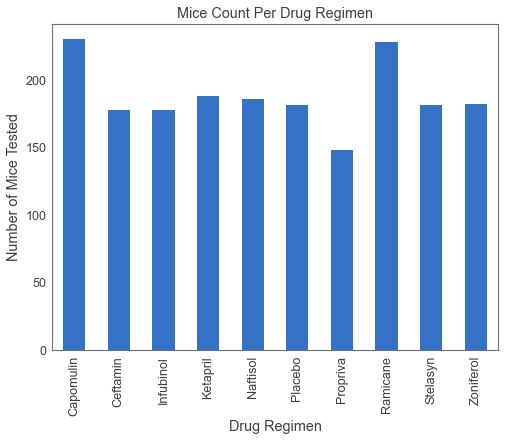

In [69]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#Group the df by drug regimen, take the count, and filter it to the Mouse ID index
drug_mice = mice_data.groupby(['Drug Regimen']).count()['Mouse ID']
#Create bar graph to plot the df created above
fig1 = drug_mice.plot(kind = 'bar', figsize = (8,6), title = "Mice Count Per Drug Regimen")
#Set a y axis label
fig1.set(ylabel = 'Number of Mice Tested')
#hide the gridlines
fig1.grid()

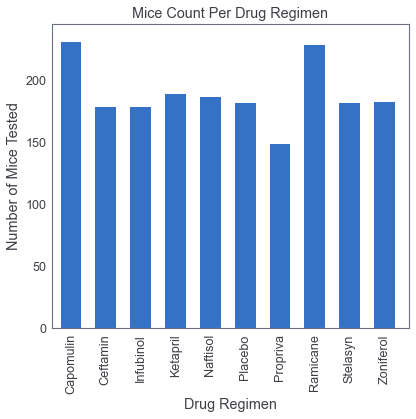

In [161]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#Group the df by drug regimen, take the count, and filter it to the Mouse ID index
drug_mice = mice_data.groupby(['Drug Regimen']).count()['Mouse ID']

#Turn the drug_mice series into a data frame and change index from drug regimen to numeric
drug_mice_df = drug_mice.to_frame(name = 'Number of Mice').reset_index()
drug_mice_df

#set x-axis and format ticks
x_axis = np.arange(len(drug_mice_df['Drug Regimen']))
ticks = [value+0.3 for value in x_axis]
plt.xticks(ticks, drug_mice_df['Drug Regimen'], rotation = 'vertical')

#Plot bar graph
plt.bar(x_axis,drug_mice_df['Number of Mice'], align = 'edge', width = 0.60)

#Set limits, add titles, and axis labels
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(drug_mice_df['Number of Mice']) + 15)
plt.title('Mice Count Per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')

#Format graph to be easier to the eyes
plt.grid()




In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
